## Divorce Prediction

Given *survey data from couples in Turkey*, let's try to predict if a given couple is **divorced**.

We will use a logistic regression model to make our predictions.

We will use principal component analysis to reduce the dimension of the data and show that the same results can be achieved with a smaller number of features, as well as to visualize the data. 

Data source: https://www.kaggle.com/datasets/andrewmvd/divorce-prediction

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('divorce_data.csv')
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,3,4,0,0,4,0,1,0,1,0,0,0,0,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,1,3,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,2,1,3,3,0,2,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,4,1,2,1,1,0,4,3,3,2,2,3,2,4,3,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

### Training a Model

In [7]:
y = data['Divorce'].copy()
X = data.drop('Divorce', axis=1).copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=9)

In [10]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,1,4,2,0,4,2,1,1,0,0,0,1,0,0
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1
23,3,3,3,4,3,1,1,3,3,4,3,3,3,3,3,4,3,3,3,3,3,4,3,3,3,3,3,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
84,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
100,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,2,0,2,2,1,2,0,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,4,0,4,4,4,3,1,1,1,2,0,1
56,3,4,3,4,3,0,1,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
169,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,2,2,0,1,3,4,4,0,1,3,3,3,1
92,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,1,0,0,1,1,1,1,1,1


In [11]:
model = LogisticRegression()

model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

Test Accuracy: 100.00%


### Using PCA for Dimensionality Reduction

In [13]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,1,4,2,0,4,2,1,1,0,0,0,1,0,0
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1
23,3,3,3,4,3,1,1,3,3,4,3,3,3,3,3,4,3,3,3,3,3,4,3,3,3,3,3,4,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
84,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
100,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,1,0,0,0,0,0,2,0,2,2,1,2,0,0,0,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,4,0,4,4,4,3,1,1,1,2,0,1
56,3,4,3,4,3,0,1,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
169,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,2,2,0,1,3,4,4,0,1,3,3,3,1
92,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,1,0,0,1,1,1,1,1,1


In [40]:
n_components = 1

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])

In [45]:
X_train_reduced

,PC1
97,-8.984943
89,-9.607483
23,13.622388
84,-10.594181
100,-8.970917
...,...
150,-7.772233
56,11.683215
169,-7.201518
92,-8.980489


In [41]:
X_train_reduced.var()

PC1    99.225446
dtype: float64

In [42]:
X_train.var()

Q1     2.694770
Q2     2.199044
Q3     2.122048
Q4     2.257352
Q5     2.624366
Q6     0.729321
Q7     0.490004
Q8     2.404462
Q9     2.400478
Q10    2.110749
Q11    2.626394
Q12    2.200203
Q13    2.206070
Q14    2.235839
Q15    2.306316
Q16    2.305737
Q17    2.572287
Q18    2.490584
Q19    2.633058
Q20    2.353180
Q21    2.024120
Q22    2.098870
Q23    2.507026
Q24    2.245763
Q25    2.320223
Q26    2.282486
Q27    2.118572
Q28    2.146313
Q29    2.411198
Q30    2.186006
Q31    2.768941
Q32    2.569100
Q33    3.085905
Q34    2.626974
Q35    3.311314
Q36    3.136390
Q37    3.038099
Q38    2.989425
Q39    2.936477
Q40    3.191439
Q41    2.967985
Q42    2.471389
Q43    1.906417
Q44    2.870926
Q45    2.438722
Q46    2.011010
Q47    2.511951
Q48    1.314211
Q49    2.284804
Q50    2.007316
Q51    1.669492
Q52    2.359916
Q53    2.310372
Q54    2.751630
dtype: float64

/tmp/ipykernel_6680/3122147280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=['PC' + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


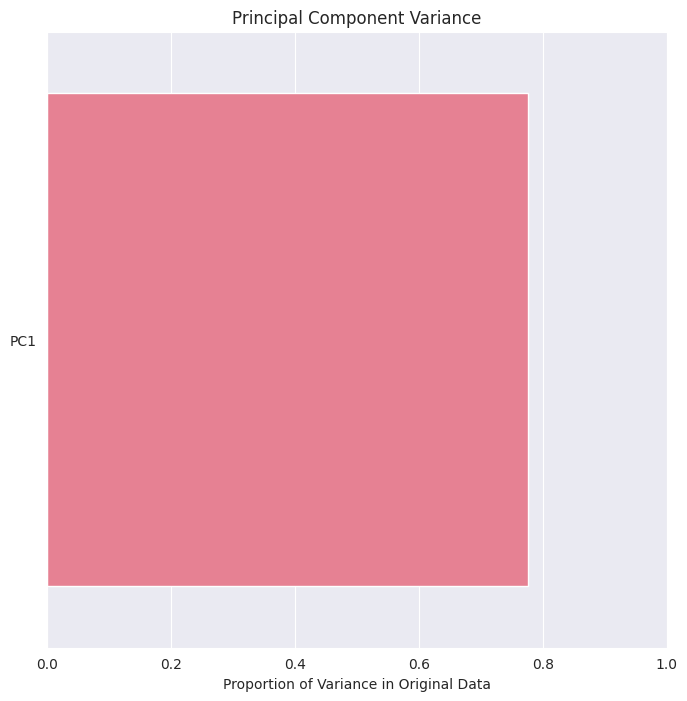

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x=pca.explained_variance_ratio_, y=['PC' + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel("Proportion of Variance in Original Data")
plt.title("Principal Component Variance")
plt.show()

In [46]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test)*100))

Test Accuracy (1 Components): 100.00%


### Using PCA for Visualization

In [47]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])

In [48]:
X_train_reduced

,PC1,PC2
97,-8.984943,1.336386
89,-9.607483,-1.879881
23,13.622388,0.818844
84,-10.594181,-2.306818
100,-8.970917,0.687279
...,...,...
150,-7.772233,3.633244
56,11.683215,-2.868983
169,-7.201518,1.894490
92,-8.980489,-0.859954


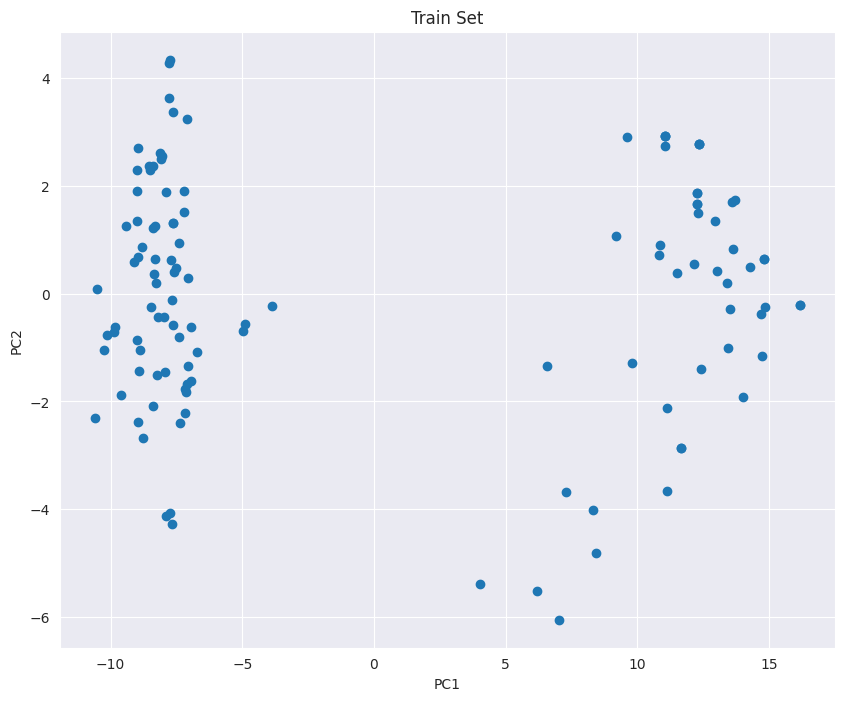

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_reduced['PC1'], X_train_reduced['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Train Set")
plt.show()

In [52]:
y_train

97     0
89     0
23     1
84     0
100    0
      ..
150    0
56     1
169    0
92     0
126    0
Name: Divorce, Length: 118, dtype: int64

In [53]:
X_train_reduced.loc[y_train == 0, :]

,PC1,PC2
97,-8.984943,1.336386
89,-9.607483,-1.879881
84,-10.594181,-2.306818
100,-8.970917,0.687279
93,-8.930517,-1.426313
...,...,...
125,-7.638720,1.304536
150,-7.772233,3.633244
169,-7.201518,1.894490
92,-8.980489,-0.859954


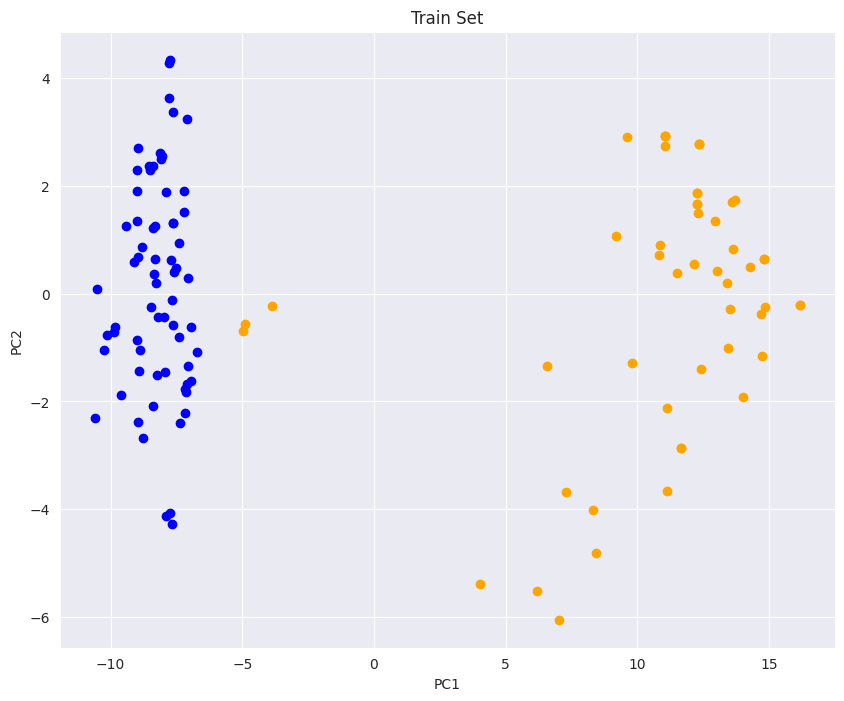

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(X_train_reduced.loc[y_train==0, 'PC1'], X_train_reduced.loc[y_train==0, 'PC2'], label="Married", color="blue")
plt.scatter(X_train_reduced.loc[y_train==1, 'PC1'], X_train_reduced.loc[y_train==1, 'PC2'], label="Divorced", color="orange")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Train Set")
plt.show()

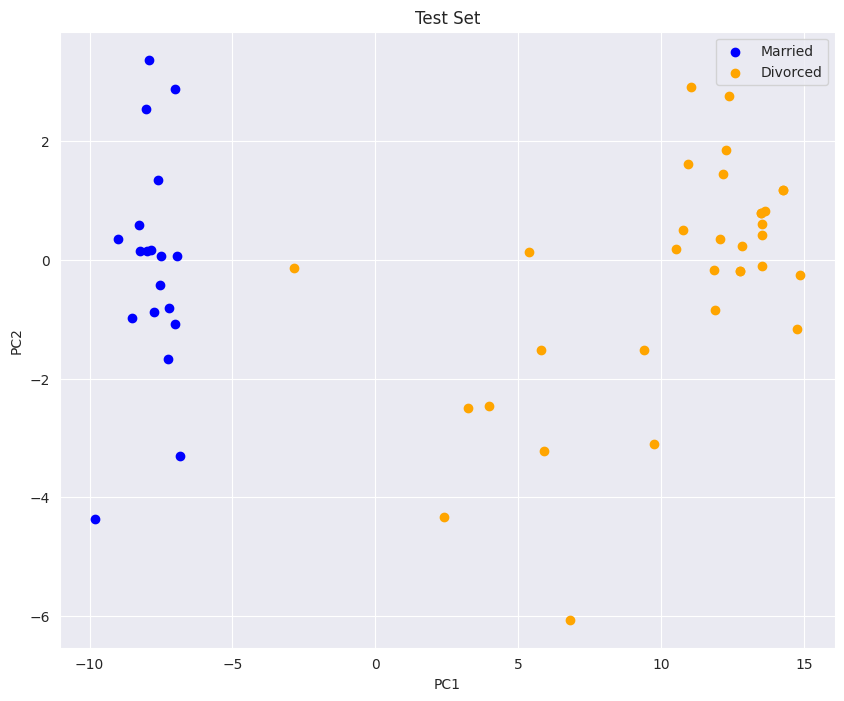

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(X_test_reduced.loc[y_test==0, 'PC1'], X_test_reduced.loc[y_test==0, 'PC2'], label="Married", color="blue")
plt.scatter(X_test_reduced.loc[y_test==1, 'PC1'], X_test_reduced.loc[y_test==1, 'PC2'], label="Divorced", color="orange")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Test Set")
plt.legend()
plt.show()

In [61]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test)*100))

Test Accuracy (2 Components): 100.00%


In [62]:
reduced_model.predict(X_test_reduced)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0])

In [63]:
y_test

13     1
161    0
69     1
143    0
44     1
168    0
17     1
70     1
39     1
153    0
38     1
78     1
133    0
67     1
54     1
55     1
60     1
88     0
27     1
28     1
118    0
51     1
6      1
80     1
101    0
30     1
37     1
26     1
68     1
31     1
123    0
136    0
134    0
138    0
3      1
9      1
163    0
2      1
25     1
21     1
144    0
53     1
83     1
167    0
8      1
105    0
151    0
20     1
73     1
145    0
43     1
122    0
Name: Divorce, dtype: int64

In [65]:
misclassifications = X_test_reduced.loc[reduced_model.predict(X_test_reduced) != y_test, :]
misclassifications

,PC1,PC2


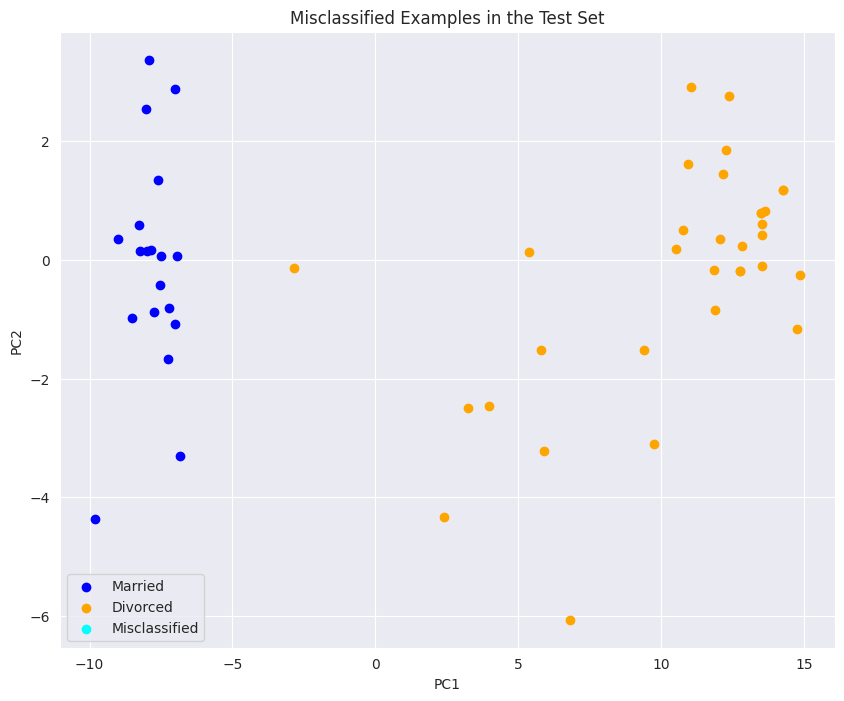

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(X_test_reduced.loc[y_test==0, 'PC1'], X_test_reduced.loc[y_test==0, 'PC2'], label="Married", color="blue")
plt.scatter(X_test_reduced.loc[y_test==1, 'PC1'], X_test_reduced.loc[y_test==1, 'PC2'], label="Divorced", color="orange")
plt.scatter(misclassifications['PC1'], misclassifications['PC2'], label="Misclassified", color='cyan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Misclassified Examples in the Test Set")
plt.legend()
plt.show()